# Data 401 Homework for Project 2

In [16]:
# read in the data
import pandas as pd
X = pd.read_csv('./hw.csv')
y = pd.read_csv('./hw1.csv')

# make SK_ID_CURR the index
X = X.set_index('SK_ID_CURR')
y = y.set_index('SK_ID_CURR')

df_merged = X.merge(y, on='SK_ID_CURR')
df_merged

CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
SK_ID_CURR                                                             
152239              0.0             0                0             0   
440121              1.0             1                0             1   
448318              0.0             0                1             1   
139787              0.0             1                1             2   
414927              1.0             0                1             0   
...                 ...           ...              ...           ...   
118837              0.0             0                1             0   
341127              0.0             0                1             0   
284834              0.0             0                1             1   
111308              0.0             1                0             0   
105908              0.0             1                1             0   

            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR                                                               
152239              189000.0    521280.0      27292.5         450000.0   
440121              405000.0   1665000.0      45918.0        1665000.0   
448318               90000.0    158148.0       7821.0         103500.0   
139787              202500.0   1147500.0      37147.5        1147500.0   
414927              157500.0    571446.0      18562.5         477000.0   
...                      ...         ...          ...              ...   
118837              157500.0    959598.0      28188.0         801000.0   
341127              247500.0    203760.0      16096.5         180000.0   
284834               40500.0    202500.0      10125.0         202500.0   
111308               67500.0    661500.0      17577.0         661500.0   
105908              225000.0    337500.0      16875.0         337500.0   

            REGION_POPULATION_RELATIVE  EXT_SOURCE_1  ...  \
SK_ID_CURR                                            ...   
152239                        0.035792      0.655730  ...   
440121                        0.035792      0.479410  ...   
448318                        0.007330      0.436065  ...   
139787                        0.007020      0.656323  ...   
414927                        0.022625      0.053175  ...   
...                                ...           ...  ...   
118837                        0.018801      0.475982  ...   
341127                        0.008625      0.566565  ...   
284834                        0.018850      0.190707  ...   
111308                        0.007020      0.336292  ...   
105908                        0.019101      0.343300  ...   

            NAME_FAMILY_STATUS_Single / not married  \
SK_ID_CURR                                            
152239                                            0   
440121                                            0   
448318                                            0   
139787                                            0   
414927                                            1   
...                                             ...   
118837                                            0   
341127                                            0   
284834                                            0   
111308                                            1   
105908                                            0   

            NAME_FAMILY_STATUS_Unknown  NAME_FAMILY_STATUS_Widow  \
SK_ID_CURR                                                         
152239                               0                         0   
440121                               0                         0   
448318                               0                         0   
139787                               0                         0   
414927                               0                         0   
...                                ...                       ...   
118837                               0                    

Explore Predictor-Target Relationships

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize numeric predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_merged[numeric_columns])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to data
df_merged['Cluster'] = clusters

# Analyze clusters
print(df_merged.groupby('Cluster')[numeric_columns].mean())

/Users/ishaansathaye/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
Cluster                                                             
0           0.252066      0.293388         0.743802      0.590909   
1           0.411765      0.352941         0.450980      0.450980   
2           0.364486      0.551402         0.700935      0.560748   

         AMT_INCOME_TOTAL    AMT_CREDIT   AMT_ANNUITY  AMT_GOODS_PRICE  \
Cluster                                                                  
0           142711.363636  4.688636e+05  22575.347107    417302.293388   
1           155558.823529  5.058808e+05  23596.411765    452205.882353   
2           267008.929907  1.038078e+06  42623.663551    954700.780374   

         REGION_POPULATION_RELATIVE  EXT_SOURCE_1  ...  \
Cluster                                            ...   
0                          0.019308      0.498299  ...   
1                          0.020367      0.383858  ...   
2                          0.025198      0.560834  

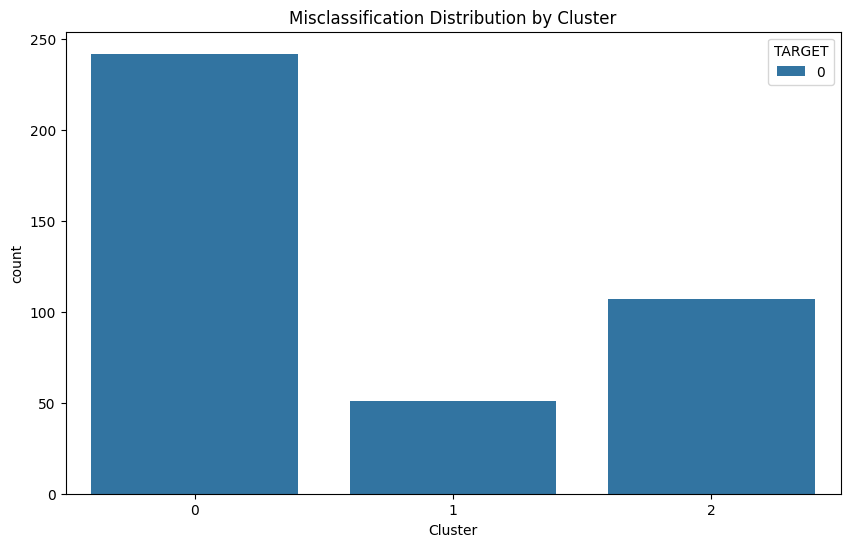

In [20]:
# Add cluster column to the merged dataset
df_merged['Cluster'] = df_merged['Cluster']

# Visualize the target variable distribution by cluster
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df_merged, x='Cluster', hue=y.TARGET)
plt.title('Misclassification Distribution by Cluster')
plt.show()